In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from spectral import *
import numpy as np
import scipy.spatial.distance as distance
import pylab
import spectral.io.envi as envi
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from timeit import default_timer as timer

In [4]:
from autoclustering import find_maxdist_clusters
from hiersubclustering import subdivide_by_modules
from visual_utils import show_classes, show_histogram, show_centers
from math_utils import cluster_histogram, normalized

Читаем изображение.

In [5]:
#img = open_image('92AV3C.lan')
# gt = open_image('92AV3GT.GIS').read_band(0)
img = envi.open('f080611t01p00r07rdn_c_sc01_ort_img.hdr')

In [6]:
print(img)

	Data Source:   '/home/marko/HSI/f080611t01p00r07rdn_c/f080611t01p00r07rdn_c_sc01_ort_img'
	# Rows:           1924
	# Samples:         753
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16


In [7]:
#data = img[:,:,:]
data = img[400:1000, 200:, :]
#data = img[400:700, 200:400, :]

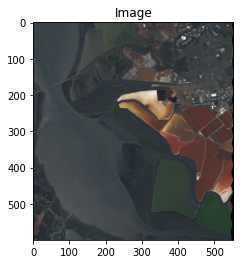

In [8]:
view = imshow(data, (29, 20, 12), title="Image")

In [9]:
data[data <= 0] = 1
print(data.dtype)

>i2


In [110]:
from autoclustering import *
from class_cluster_compress import *
from kmeans import *
from visual_utils import *

In [31]:
(class_map, centers) = find_related_clusters2(data, 0.99)
# (class_map, centers) = find_maxdist_clusters(data, 0.99)
#(class_map, centers) = find_ppi_clusters(data)
(class_map, centers) = kmeans_cosine(data, nclusters=centers.shape[0], max_iterations=10, start_clusters=centers)
print('Centers\' shape: ', centers.shape)

assigning values...left 0             
done
Centers' shape:  (176, 224)


In [32]:
scale_map = compute_scale_map(data, class_map, centers)
reconstruction = reconstruct_image(scale_map, class_map, centers)
print_diff_stats(data, reconstruction)

Norm:  876957.978605958
Max:  2360.0503142503053
Min:  0.0
Avg:  58.8484442740246


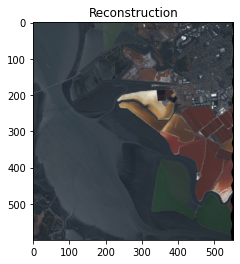

In [23]:
view = imshow(reconstruction, (29, 20, 12), title="Reconstruction")

ImageView object:
  Interpolation       :  <default>

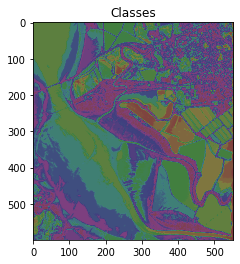

In [35]:
show_classes(class_map)

In [145]:
it_counts = [0, 1, 2, 7, 23, 37, 63]
class_map_mod = None

In [146]:
(class_map_1, centers_1) = find_related_clusters2(data, 0.99)
simple_related_error_burndown = []

centers_mod = centers_1
for it_count in it_counts:
    print('Running for it_count {}'.format(it_count))
    (class_map_mod, centers_mod) = kmeans_cosine(data, nclusters=centers_mod.shape[0], max_iterations=it_count, start_clusters=centers_mod)
    scale_map = compute_scale_map(data, class_map_mod, centers_mod)
    reconstruction = reconstruct_image(scale_map, class_map_mod, centers_mod)
    avg_diff = get_avg_diff(data, reconstruction)
    print('Avg diff: ', avg_diff)
    simple_related_error_burndown.append(avg_diff)

class_map_mod_1 = class_map_mod.copy()

99% completed
Running for it_count 0
0 pixels reassigned in last iteration.
kmeans terminated with 1 clusters after 0 iterations.
Avg diff:  213.6262891891601
Running for it_count 1
Iteration 1 (0 pixels reassinged previously)...226522 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 1 iterations.
Avg diff:  43.298752776860844
Running for it_count 2
Iteration 2 (234811 pixels reassinged previously)...50329 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 2 iterations.
Avg diff:  35.05471563664831
Running for it_count 7
Iteration 7 (13182 pixels reassinged previously)....13930 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 7 iterations.
Avg diff:  31.500648081112338
Running for it_count 23
Iteration 23 (2891 pixels reassinged previously)....2970 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 23 iterations.
Avg diff:  30.157888590075505
Running for it_count 37
Itera

In [147]:
(class_map_2, centers_2) = find_maxdist_clusters(data, 0.99)
simple_maxdist_error_burndown = []
centers_mod = centers_2

for it_count in it_counts:
    print('Running for it_count {}'.format(it_count))
    centers_mod = centers_1
    (class_map_mod, centers_mod) = kmeans_cosine(data, nclusters=centers_mod.shape[0], max_iterations=it_count, start_clusters=centers_mod)
    scale_map = compute_scale_map(data, class_map_mod, centers_mod)
    reconstruction = reconstruct_image(scale_map, class_map_mod, centers_mod)
    avg_diff = get_avg_diff(data, reconstruction)
    print('Avg diff: ', avg_diff)
    simple_maxdist_error_burndown.append(avg_diff)

class_map_mod_2 = class_map_mod.copy()

assigning values...left 0             
done
Running for it_count 0
0 pixels reassigned in last iteration.
kmeans terminated with 1 clusters after 0 iterations.
Avg diff:  213.6262891891601
Running for it_count 1
Iteration 1 (0 pixels reassinged previously)...226522 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 1 iterations.
Avg diff:  43.298752776860844
Running for it_count 2
Iteration 2 (226522 pixels reassinged previously)...70078 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 2 iterations.
Avg diff:  37.6680880420203
Running for it_count 7
Iteration 7 (19127 pixels reassinged previously)....15027 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 7 iterations.
Avg diff:  32.30617185298796
Running for it_count 23
Iteration 23 (3122 pixels reassinged previously)....3206 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 23 iterations.
Avg diff:  30.439238826824877
R

In [ ]:
(class_map_3, centers_3) = find_ppi_clusters(data)
ppi_error_burndown = []
centers_mod = centers_3

for it_count in it_counts:
    print('Running for it_count {}'.format(it_count))
    (class_map_mod, centers_mod) = kmeans_cosine(data, nclusters=centers_mod.shape[0], max_iterations=it_count, start_clusters=centers_mod)
    scale_map = compute_scale_map(data, class_map_mod, centers_mod)
    reconstruction = reconstruct_image(scale_map, class_map_mod, centers_mod)
    avg_diff = get_avg_diff(data, reconstruction)
    print('Avg diff: ', avg_diff)
    ppi_error_burndown.append(avg_diff)

class_map_mod_3 = class_map_mod.copy()

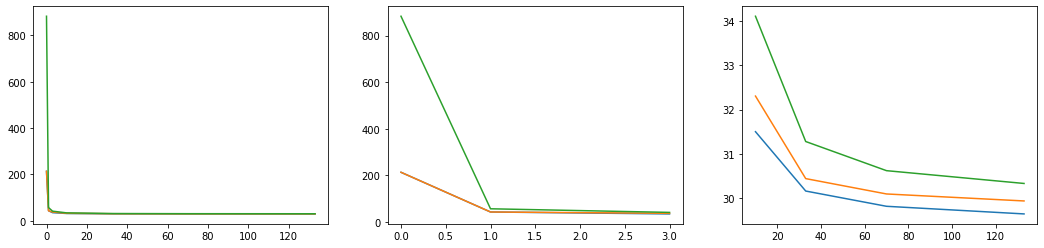

In [157]:
counts_cumsum = np.cumsum(it_counts)

fig = pylab.figure()
fig.set_size_inches(18, 4)
pylab.subplot(1, 3, 1)
pylab.plot(counts_cumsum, simple_related_error_burndown)
pylab.plot(counts_cumsum, simple_maxdist_error_burndown)
pylab.plot(counts_cumsum, ppi_error_burndown)

pylab.subplot(1, 3, 2)
pylab.plot(counts_cumsum[:3], simple_related_error_burndown[:3])
pylab.plot(counts_cumsum[:3], simple_maxdist_error_burndown[:3])
pylab.plot(counts_cumsum[:3], ppi_error_burndown[:3])


pylab.subplot(1, 3, 3)
pylab.plot(counts_cumsum[3:], simple_related_error_burndown[3:])
pylab.plot(counts_cumsum[3:], simple_maxdist_error_burndown[3:])
pylab.plot(counts_cumsum[3:], ppi_error_burndown[3:])

ImageView object:
  Interpolation       :  <default>

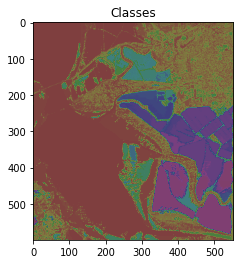

In [164]:
show_classes(class_map_1)

ImageView object:
  Interpolation       :  <default>

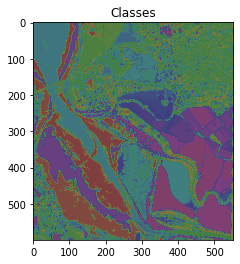

In [159]:
show_classes(class_map_mod_1)

ImageView object:
  Interpolation       :  <default>

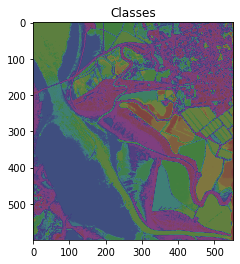

In [160]:
show_classes(class_map_2)

ImageView object:
  Interpolation       :  <default>

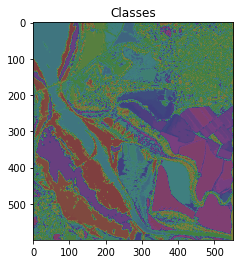

In [161]:
show_classes(class_map_mod_2)

ImageView object:
  Interpolation       :  <default>

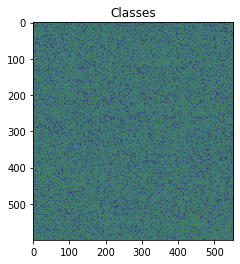

In [162]:
show_classes(class_map_3)

ImageView object:
  Interpolation       :  <default>

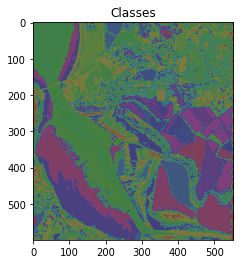

In [163]:
show_classes(class_map_mod_3)

In [165]:
(class_map_4, centers_4) = find_related_clusters2(data, 0.99, start_centers=centers_3)

99% completed


ImageView object:
  Interpolation       :  <default>

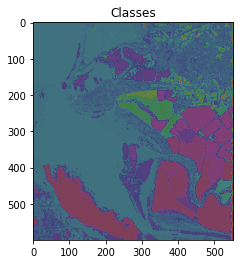

In [166]:
show_classes(class_map_4)

In [167]:
a = np.arange(12).reshape((3, 2, 2))
mp = np.arange(6).reshape((3, 2))
mp[1, 1] = -1
mp[2, 1] = -1
indices = np.nonzero(mp < 0)
a[indices]

array([[ 6,  7],
       [10, 11]])

In [168]:
print(a)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]


In [176]:
print(centers_3.shape)

(112, 224)


In [178]:
print(np.sum(class_map_3 == 2))

2912


range(0, 111) 111
[2763 3024 2912 3097 2963 3004 2997 2882 3028 2952 2909 3018 2996 3011
 2919 3067 2966 3068 2978 3087 2935 2928 3146 2951 3031 2866 2954 3022
 3196 2993 2970 3053 2901 2953 3029 2944 3000    0    0 2929 3104 2889
 3026 2839 2994 2959 3061 3012 2892 3051 3061 2997 3064 2992 3045 2931
 3037 2856 3000 2951 2946 2914 5634 3024 2945 2957 3018 3000 3009 2924
 3073 3019 3052 2910 2890 2951 2937 3003 3091 3022 2984 3020 3054 3117
 3055 3065 3058 3043 2883 3026 2972 3018 3029 2942 2956 2950 3014 3047
 2949 3076 2950 3009 3012 3034 2882 2950 3045 3049 3086 2981 6022]


(array([2763., 3024., 2912., 3097., 2963., 3004., 2997., 2882., 3028.,
        2952., 2909., 3018., 2996., 3011., 2919., 3067., 2966., 3068.,
        2978., 3087., 2935., 2928., 3146., 2951., 3031., 2866., 2954.,
        3022., 3196., 2993., 2970., 3053., 2901., 2953., 3029., 2944.,
        3000.,    0.,    0., 2929., 3104., 2889., 3026., 2839., 2994.,
        2959., 3061., 3012., 2892., 3051., 3061., 2997., 3064., 2992.,
        3045., 2931., 3037., 2856., 3000., 2951., 2946., 2914., 5634.,
        3024., 2945., 2957., 3018., 3000., 3009., 2924., 3073., 3019.,
        3052., 2910., 2890., 2951., 2937., 3003., 3091., 3022., 2984.,
        3020., 3054., 3117., 3055., 3065., 3058., 3043., 2883., 3026.,
        2972., 3018., 3029., 2942., 2956., 2950., 3014., 3047., 2949.,
        3076., 2950., 3009., 3012., 3034., 2882., 2950., 3045., 3049.,
        3086., 2981., 6022.]),
 array([  0.        ,   0.99099099,   1.98198198,   2.97297297,
          3.96396396,   4.95495495,   5.94594595,   6

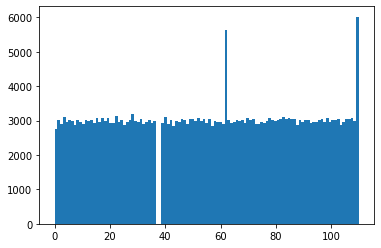

In [175]:
hist_values = class_map_3.flatten()
hist_values, bins = np.histogram(hist_values, bins=np.max(hist_values))
print(range(len(hist_values)), len(hist_values))
print(hist_values)
pylab.hist(range(len(hist_values)), len(hist_values), weights=hist_values)

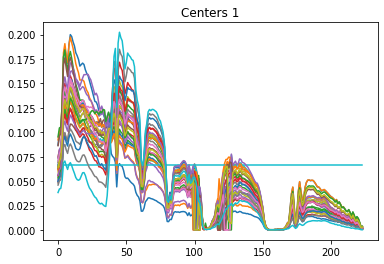

In [181]:
show_centers(centers_1, 'Centers 1')

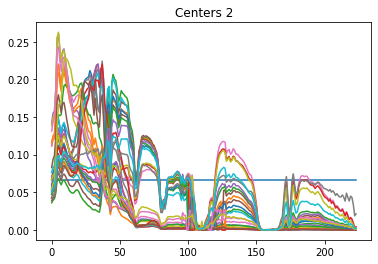

In [183]:
show_centers(centers_2, 'Centers 2')

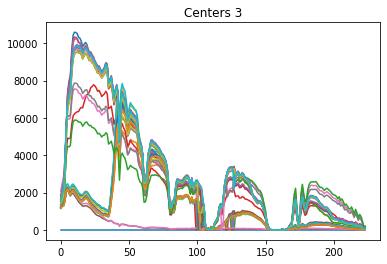

In [184]:
show_centers(centers_3, 'Centers 3')

ImageView object:
  Interpolation       :  <default>

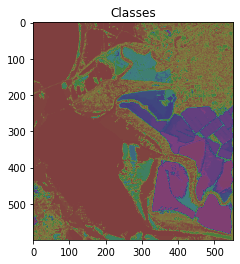

In [185]:
cm1 = compute_class_map_by_angle(data, centers_1)
show_classes(cm1)

ImageView object:
  Interpolation       :  <default>

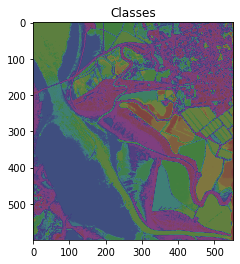

In [186]:
cm2 = compute_class_map_by_angle(data, centers_2)
show_classes(cm2)

ImageView object:
  Interpolation       :  <default>

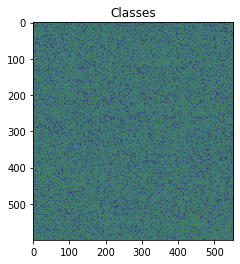

In [187]:
cm3 = compute_class_map_by_angle(data, centers_3)
show_classes(cm3)